For this tutorial we will be using Reddit data to create a model that will predict the number of upvotes or downvotes that a comment will get based on thread information. We will also do data analysis in order to see what types of variables shape these threads.

In [67]:
import praw
import datetime
import pandas as pd
import pickle
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def prawRedditClient(filepath, read_only=True):
    """
    Read the Reddit OAuth information from a textfile.
    The textfile should contain the following seperated into lines:
    client_id, client_secret, password, user_agent, username.
    
    Args:
        filepath (string): File containing OAuth information.
        ro (boolean): Whether or not to have this access be read-only
    Returns:
        reddit (praw.Reddit object): The praw object through which to access Reddit.
    """    
    with open(filepath, 'r') as f:
        oauth = f.read().split('\n')
        reddit = praw.Reddit(client_id=oauth[0], 
                             client_secret=oauth[1], 
                             password=oauth[2], 
                             user_agent=oauth[3], 
                             username=oauth[4])
        reddit.read_only = read_only
        return reddit

In [3]:
reddit = prawRedditClient("api_oauth.txt")

In [9]:
def extractFromComment(cmt):
    """
    Given a Comment object from Praw, convert to a dictionary containing
    time created, the subreddit the comment is from, and the body of the comment
    in fields "Created", "Subreddit", and "Body". Also includes a "Level" of the 
    comment if lvl is included
    
    Args:
        cmt (Praw.Comment): Comment object from Praw.
        lvl (integer): What level the comment is (e.g. reply (1), reply of reply (2))
    Returns:
        ret (dict): Dictionary containing some information.
    """ 
    ret = {}
    ret["created"] = datetime.datetime.fromtimestamp(cmt.created_utc)
    ret["subreddit"] = cmt.subreddit_name_prefixed
    ret["body"] = cmt.body
    ret["score"] = cmt.score
    ret["ups"] = cmt.ups
    ret["downs"] = cmt.downs
    ret["controversiality"] = cmt.controversiality
    ret["id"] = cmt.id
    ret["link_id"] = cmt.link_id
    ret["permalink"] = "www.reddit.com" + cmt.permalink
    return ret

In [30]:
submissions = []
searchstr = 'North Korea'
for submission in reddit.subreddit('all').search(searchstr, time_filter="year", limit=None):
    submissions.append(submission)
print(len(submissions))

245


In [31]:
submissions = []

i=1
searchstr = 'North Korea'#North Korea OR Kim Jong-un OR Kim Jong un OR DPRK
for submission in reddit.subreddit('all').search(searchstr, time_filter="year", limit=None):# sort="new",
    submission.comments.replace_more(limit=1)
    print(i, submission.title)
    i+=1
    for cmt_1 in submission.comments: #top_level_comment
        submissions.append(extractFromComment(cmt_1))
        for cmt_2 in cmt_1.replies:#2nd_level_comment
            submissions.append(extractFromComment(cmt_2))
            
print(len(submissions))

1 North Korea frees US detainees
2 North Korea: No need for more missile tests
3 North Korea says denuclearisation pledge not result of US-led sanctions
4 North Korea's nuclear test site will close in May, South Korea says
5 Kim Jong Un received a USB from South Korea's president with a blueprint for connecting North Korea with the world.
6 North Korea drops withdrawal of U.S. forces as condition of denuclearization, South Korea's Moon says.
7 North Korea's Kim Jong Un crosses DMZ for historic meeting with South Korea
8 [MEGATHREAD] North Korea and South Korea will be signing peace treaty to end the Korean war after 65 years
9 North Korea calls for reunification with South Korea
10 North Korea is shifting its time zone 30 minutes to align with South Korea's
11 North Korea changes its time zone to match South Korea
12 Skinny Kim Jong Un would make the situation with North Korea more intimidating
13 Japanese government warns North Korea missile headed toward northern Japan, report says
1

87 MRW The front page is nothing but good news about North Korea and its advances towards peace with South Korea
88 In light of recent events with North Korea, I present you with this.
89 North Korea's Kim Jong Un says ICBM a 'gift' to 'American bastards' on their July 4 anniversary
90 Release of Americans held in North Korea 'imminent,' source says
91 TIL According to his biography, Kim Jung-Il first picked up a golf club in 1994, at North Korea's only golf course, and shot a 38-under par round that included no fewer than 11 holes in one. Satisfied with his performance, he reportedly immediately declared his retirement from the sport.
92 North Korea will invite foreign experts and media to witness dismantling of nuclear test site, South says
93 North Korea's Darkest Secrets (2017) - You have to admire the people who are smuggling these clips out, they must have tremendous courage. [51:58]
94 North Korea on Sunday criticized what it called "misleading" claims that President Trump's pol

160 North Korea calls hotline to South Korea in major diplomatic move
161 Trump says South Korea to make 'major announcement' on North Korea
162 Mattis: ‘Massive Military Response’ If North Korea Threatens U.S., Allies
163 North Korea mocks Trump and his 'lackeys' over State of the Union address
164 Russian spies hacked the Olympics and tried to make it look like North Korea did it, U.S. officials say
165 Jimmy Carter wants to go on a peace mission to North Korea
166 Red Pill!!! CNN Reporter in North Korea Left ‘Speechless’ By Nuclear Announcement: ‘Huge Win For President Trump’
167 When you hear about South Korea and North Korea planning to formally declare peace
168 US Spy Satellites Catch Chinese Ships Illegally Selling Oil To North Korea
169 Japan deploys missile defence over North Korea threat to Guam
170 Nobel Prize Incoming: South Korean president credits Trump with bringing North Korea to the table - The Washington Post
171 Trump now calls North Korea’s Kim ‘very honorable.’ Le

239 TIL that North Korea has a VHS copy of Space Jam enshrined in a musuem
240 PRESIDENT TRUMP: North Korea has just launched another missile. Does this guy have anything better to do with his life? Hard to believe that South Korea and Japan will put up with this much longer. Perhaps China will put a heavy move on North Korea and end this nonsense once and for all!
241 Russian spies hacked the Olympics and tried to make it look like North Korea did it, U.S. officials say
242 US unleashes bombers in ‘North Korea nuke drill’ as it's claimed Trump is 'poised to launch military strike'
243 70% of Millennials Believe U.S. Student Loan Debt Poses Bigger Threat to U.S. Than North Korea
244 US expands its controversial travel ban to include people from North Korea, Venezuela and Chad
245 James Mattis stands feet away from the border of North Korea with his back turned... CAN YOU SAY NUTS OF STEEL?
47739


Now that we have everything in results, we start to work with the data in order to see patterns.

In [32]:
results = pd.DataFrame(submissions)

In [33]:
# Save to file
#pickle.dump( results, open( "firsttry.p", "wb" ) )

# Load from file
#pickle.load( open( "firsttry.p", "rb" ) )

In [36]:
results

,body,controversiality,created,downs,id,link_id,permalink,score,subreddit,ups
0,News like this is always welcome,0,2018-05-09 10:24:37,0,dyp6x1x,t3_8i5mnq,www.reddit.com/r/worldnews/comments/8i5mnq/nor...,7046,r/worldnews,7046
1,Yep. Seems like a clear indication that we're ...,0,2018-05-09 12:11:51,0,dype5s2,t3_8i5mnq,www.reddit.com/r/worldnews/comments/8i5mnq/nor...,1052,r/worldnews,1052
2,Welcome - to be sure - but a surprise.,0,2018-05-09 11:24:06,0,dypau85,t3_8i5mnq,www.reddit.com/r/worldnews/comments/8i5mnq/nor...,862,r/worldnews,862
3,I know Kim doesn't want to give up his regime ...,0,2018-05-09 09:58:27,0,dyp59t8,t3_8i5mnq,www.reddit.com/r/worldnews/comments/8i5mnq/nor...,2574,r/worldnews,2574
4,Maybe he'll take up painting,0,2018-05-09 10:25:23,0,dyp6yuz,t3_8i5mnq,www.reddit.com/r/worldnews/comments/8i5mnq/nor...,2744,r/worldnews,2744
5,Personal musings prior to his becoming of Chai...,0,2018-05-09 10:31:42,0,dyp7dl8,t3_8i5mnq,www.reddit.com/r/worldnews/comments/8i5mnq/nor...,158,r/worldnews,158
6,It depends on if he truly has the heart of a d...,0,2018-05-09 10:40:34,0,dyp7y8p,t3_8i5mnq,www.reddit.com/r/worldnews/comments/8i5mnq/nor...,116,r/worldnews,116
7,Continue to be a dictator as his dictatorship ...,0,2018-05-09 12:37:41,0,dypfn3j,t3_8i5mnq,www.reddit.com/r/worldnews/comments/8i5mnq/nor...,6,r/worldnews,6
8,>Who are the freed Americans?\n\n>Kim Hak-song...,0,2018-05-09 09:09:16,0,dyp2h60,t3_8i5mnq,www.reddit.com/r/worldnews/comments/8i5mnq/nor...,14791,r/worldnews,14791
9,"Yo dawg, I heard you liked Kims...",0,2018-05-09 09:11:32,0,dyp2lg7,t3_8i5mnq,www.reddit.com/r/worldnews/comments/8i5mnq/nor...,5135,r/worldnews,5135


In [35]:
results.dtypes

body                        object
controversiality             int64
created             datetime64[ns]
downs                        int64
id                          object
link_id                     object
permalink                   object
score                        int64
subreddit                   object
ups                          int64
dtype: object

In [58]:
df = results.set_index('created')
df = df.sort_index()
df = df.reset_index()
df

,created,body,controversiality,downs,id,link_id,permalink,score,subreddit,ups
0,2017-05-13 17:25:14,Where was it fired at?,0,0,dhiqzuj,t3_6b08ty,www.reddit.com/r/worldnews/comments/6b08ty/nor...,358,r/worldnews,358
1,2017-05-13 17:30:08,"It was fired from the west coast, probably jus...",0,0,dhir727,t3_6b08ty,www.reddit.com/r/worldnews/comments/6b08ty/nor...,364,r/worldnews,364
2,2017-05-13 17:33:18,How much control does China have over North Ko...,0,0,dhirbmk,t3_6b08ty,www.reddit.com/r/worldnews/comments/6b08ty/nor...,1690,r/worldnews,1690
3,2017-05-13 17:33:31,What kind of missile?,0,0,dhirbze,t3_6b08ty,www.reddit.com/r/worldnews/comments/6b08ty/nor...,14,r/worldnews,14
4,2017-05-13 17:33:44,Successful 'unidentified' missile... Makes it ...,0,0,dhircaq,t3_6b08ty,www.reddit.com/r/worldnews/comments/6b08ty/nor...,4529,r/worldnews,4529
5,2017-05-13 17:35:55,"RIP some fish in the Pacific, probably.",1,0,dhirfh8,t3_6b08ty,www.reddit.com/r/worldnews/comments/6b08ty/nor...,34,r/worldnews,34
6,2017-05-13 17:38:11,"~~Not really, it's impossible to know so short...",0,0,dhirit6,t3_6b08ty,www.reddit.com/r/worldnews/comments/6b08ty/nor...,133,r/worldnews,133
7,2017-05-13 17:39:05,It is very complex. North Korea has always bee...,0,0,dhirk30,t3_6b08ty,www.reddit.com/r/worldnews/comments/6b08ty/nor...,1811,r/worldnews,1811
8,2017-05-13 17:40:31,"Oh good, I was getting tired with all the inte...",0,0,dhirm66,t3_6b08ty,www.reddit.com/r/worldnews/comments/6b08ty/nor...,2339,r/worldnews,2339
9,2017-05-13 17:41:07,> Rodong Sinmun says Trump should not expect N...,0,0,dhirn2q,t3_6b08ty,www.reddit.com/r/worldnews/comments/6b08ty/nor...,6,r/worldnews,6


In [68]:
# Save the df
pickle.dump( results, open( "curdf.p", "wb" ) )

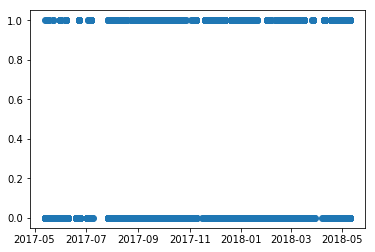

In [66]:
#plt.plot_date(df["created"], df["ups"])
plt.plot_date(df["created"], df["controversiality"])